<a href="https://colab.research.google.com/github/fender8185/FinMind/blob/master/TF2_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.12.0'

In [3]:
# Parameters.
learning_rate = 0.1
training_steps = 1000
display_step = 100
n_samples = 50

In [4]:
X = np.random.rand(n_samples).astype(np.float32)
Y = X * 10 + 5

In [5]:
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.zeros([1]))

In [6]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [7]:
# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / ( n_samples)

In [8]:
# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [13]:
# Optimization process.
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])

    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [10]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()

    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 100, loss: 0.256756, W: 8.071421, b: 6.184871
step: 200, loss: 0.034241, W: 9.295715, b: 5.432695
step: 300, loss: 0.004566, W: 9.742806, b: 5.158013
step: 400, loss: 0.000609, W: 9.906078, b: 5.057703
step: 500, loss: 0.000081, W: 9.965704, b: 5.021070
step: 600, loss: 0.000011, W: 9.987475, b: 5.007695
step: 700, loss: 0.000001, W: 9.995426, b: 5.002810
step: 800, loss: 0.000000, W: 9.998328, b: 5.001027
step: 900, loss: 0.000000, W: 9.999388, b: 5.000377
step: 1000, loss: 0.000000, W: 9.999773, b: 5.000139


In [11]:
import matplotlib.pyplot as plt

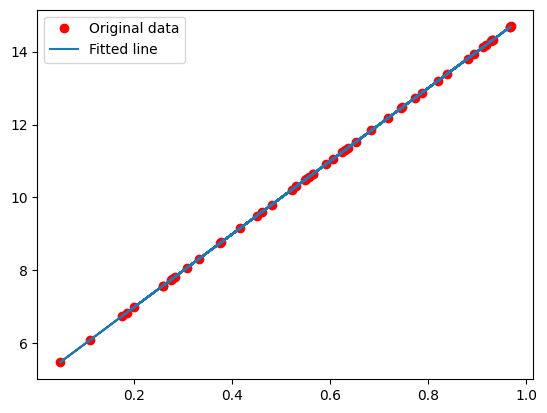

In [12]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()